<div style="background-color:#E23744; padding:10px; width:100%; height:auto;text-align:center;">
    <h1 style="color:white;">Zomato Data Analysis</h1>
</div>


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Replace 'your_file.csv' with the name of your uploaded file
df = pd.read_csv('Zomato data .csv')

# Display the first few rows of the DataFrame
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


<b> Convert the Data Type of Column Rate

In [41]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q1. What Type of Restauarants Do The Majority of Customers Orders from ?</h4>
</div>

In [43]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


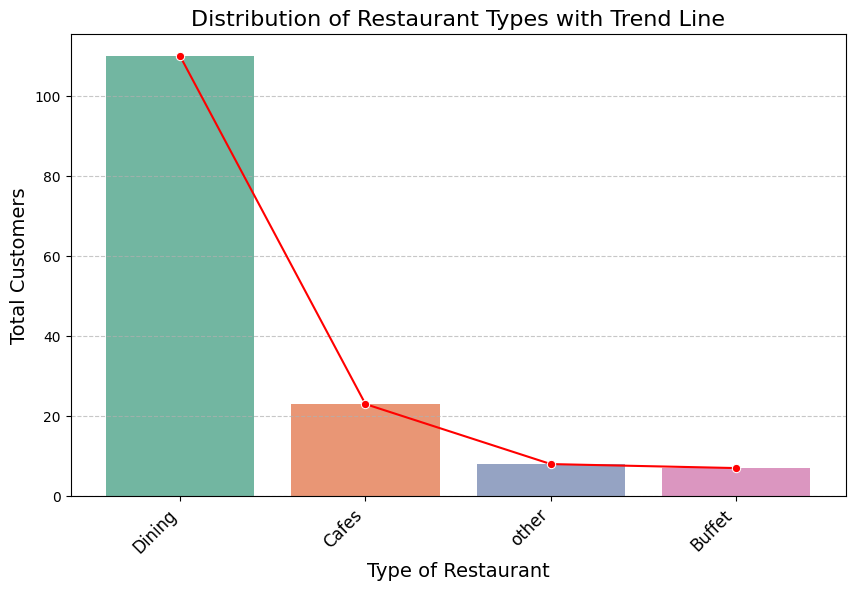

In [44]:
# Count the occurrences of each category
counts = df['listed_in(type)'].value_counts().reset_index()
counts.columns = ['listed_in(type)', 'count']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the barplot for the counts
sns.barplot(data=counts, x='listed_in(type)', y='count', hue='listed_in(type)', dodge=False, palette="Set2", legend=False)

# Add the trend line using sns.lineplot
sns.lineplot(data=counts, x='listed_in(type)', y='count', color='red', marker='o')

# Add a title and customize font sizes
plt.title('Distribution of Restaurant Types with Trend Line', fontsize=16)
plt.xlabel('Type of Restaurant', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)

# Rotate x-axis labels if they are long
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


<b> -----> Conclusion: Majority of restauarant fall under dining 

In [45]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [46]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Create a DataFrame from the grouped data
result = pd.DataFrame({"votes": grouped_data})

# Display the resulting DataFrame
result


,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q2.How many votes has each type of restaurant received from customers ?</h4>
</div>


Text(0, 0.5, 'Votes')

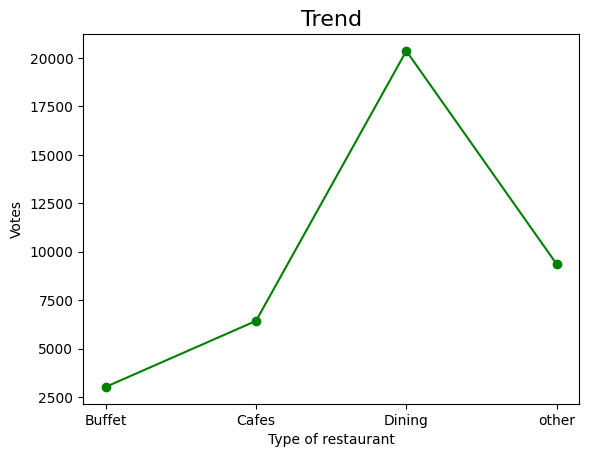

In [47]:
plt.plot(result,c="green",marker="o")
plt.title('Trend',fontsize="16")
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

---> Conclusion: Dining restauarants has received highest votes

<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q3. What are the rating that majority of restaraunts have received ?</h4>
</div>

In [48]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


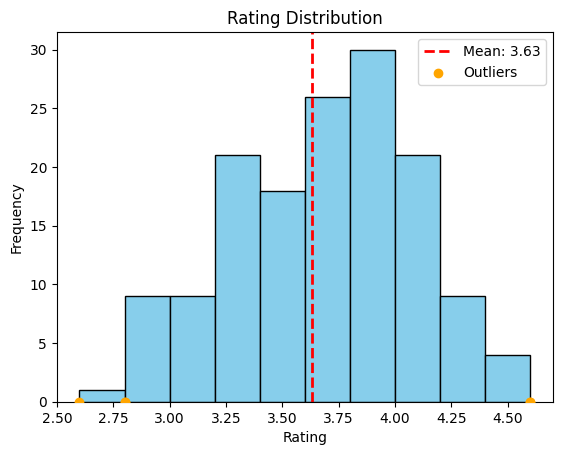

In [49]:
# Calculate the mean
mean_value = df['rate'].mean()

# Define outliers (you can adjust the criteria for what you consider an outlier)
outliers = df[(df['rate'] < (mean_value - 2 * df['rate'].std())) | (df['rate'] > (mean_value + 2 * df['rate'].std()))]['rate']

# Plot the histogram
plt.hist(df['rate'], bins=10, color='skyblue', edgecolor='black')

# Add a vertical line for the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Highlight outliers with a scatter plot
plt.scatter(outliers, [0] * len(outliers), color='orange', marker='o', label='Outliers', zorder=5)

# Add labels and title
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()

plt.show()


<b> Majority of restaurants received rating from '3.5' to '4' 

<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q4. Zomato has observed most couples order most of their food online. What is the average spending on each order ? </h4>
</div>

In [50]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

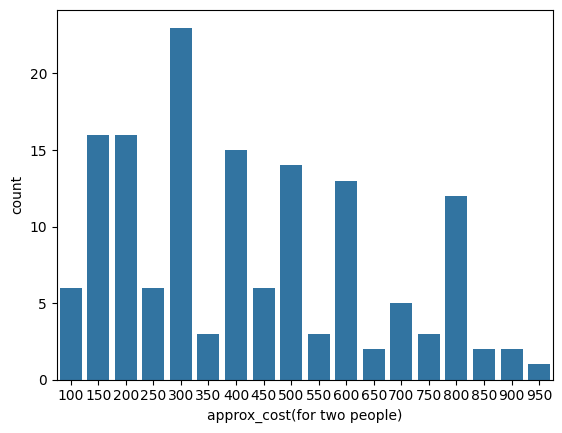

In [110]:
couple_data=df['approx_cost(for two people)']

sns.countplot(x=couple_data)

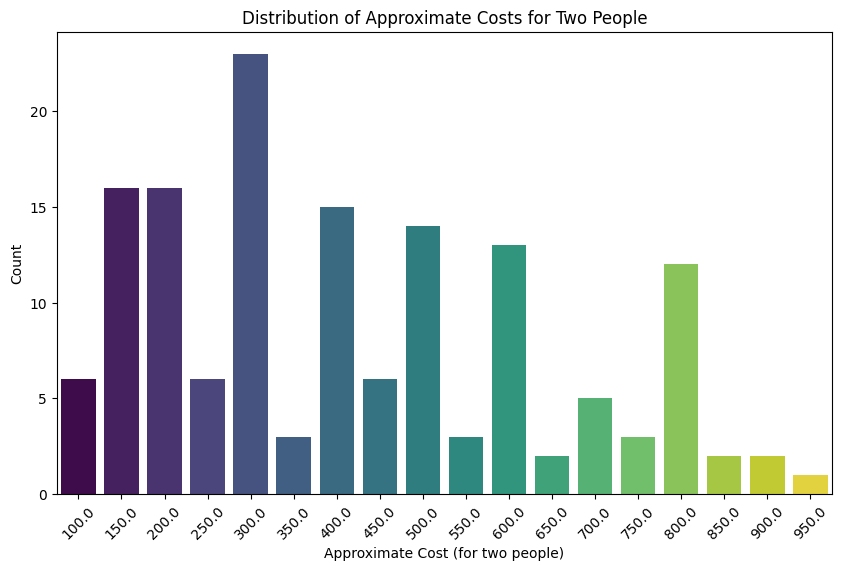

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to string if necessary, then remove commas and convert to numeric
couple_data = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

# Get the value counts sorted by count in descending order
value_counts = couple_data.value_counts().sort_values(ascending=False)

# Create a DataFrame to help with the plot
plot_data = pd.DataFrame({
    'Approx Cost': value_counts.index,
    'Count': value_counts.values
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Approx Cost', y='Count', data=plot_data, palette='viridis', hue='Approx Cost', dodge=False, legend=False)

# Add labels and title
plt.xlabel("Approximate Cost (for two people)")
plt.ylabel("Count")
plt.title("Distribution of Approximate Costs for Two People")
plt.xticks(rotation=45)
plt.show()


<b> The majority of couples prefers restaurant with approximate cost of 300 rupeees

<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q5. Which mode (online/offline) has received maximum rating ? </h4>
</div>

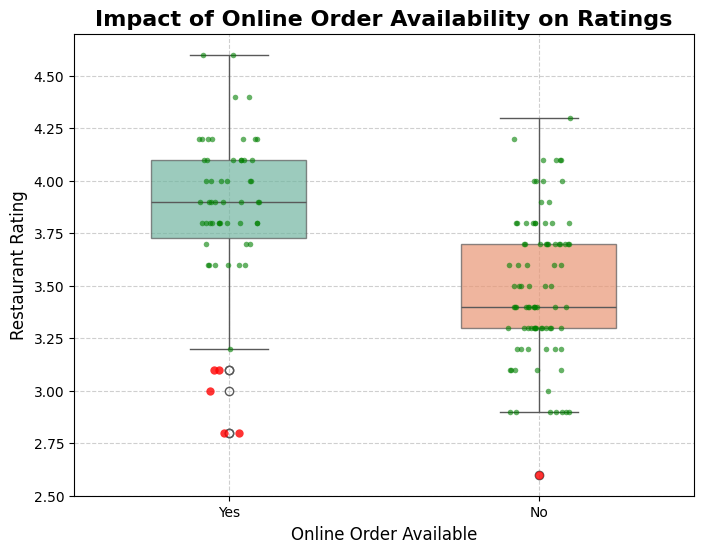

In [107]:
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

# Create the boxplot with enhanced styling
sns.boxplot(
    x='online_order', 
    y='rate', 
    data=df, 
    hue='online_order', 
    dodge=False, 
    palette='Set2', 
    width=0.5,  # Adjust the width of the boxes
    boxprops=dict(alpha=0.7)  # Make the boxplot slightly transparent
)

# Calculate IQR and outliers
Q1 = df.groupby('online_order')['rate'].quantile(0.25)
Q3 = df.groupby('online_order')['rate'].quantile(0.75)
IQR = Q3 - Q1

# Function to classify data points as outliers
def is_outlier(row):
    q1 = Q1[row['online_order']]
    q3 = Q3[row['online_order']]
    iqr = IQR[row['online_order']]
    return row['rate'] < (q1 - 1.5 * iqr) or row['rate'] > (q3 + 1.5 * iqr)

# Apply the function to the dataframe
df['is_outlier'] = df.apply(is_outlier, axis=1)

# Overlay the non-outliers in green
sns.stripplot(
    x='online_order', 
    y='rate', 
    data=df[df['is_outlier'] == False], 
    color='green', 
    alpha=0.6,  # Increased alpha for better visibility
    jitter=True, 
    size=4  # Smaller points for clarity
)

# Overlay the outliers in red
sns.stripplot(
    x='online_order', 
    y='rate', 
    data=df[df['is_outlier'] == True], 
    color='red', 
    alpha=0.8,  # Slightly higher alpha for outliers
    jitter=True, 
    size=6  # Larger points to make outliers stand out
)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add title and labels with improved font size and clarity
plt.title("Impact of Online Order Availability on Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Online Order Available", fontsize=12)
plt.ylabel("Restaurant Rating", fontsize=12)

# Remove the legend since it's redundant
plt.legend([],[], frameon=False)

plt.show()


<b> Conclusion: Offline order received lower rating in comparison to online order

<div style="background-color:#E23744; padding:10px; width:100%; height:auto;">
    <h4 style="color:white;">Q5. Which type of restaurant received more offline orders, so that zomato can povide customers with some good offers ? ? </h4>
</div>

In [76]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),is_outlier
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,False
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,False
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,False
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,False
4,Grand Village,No,No,3.8,166,600,Buffet,False


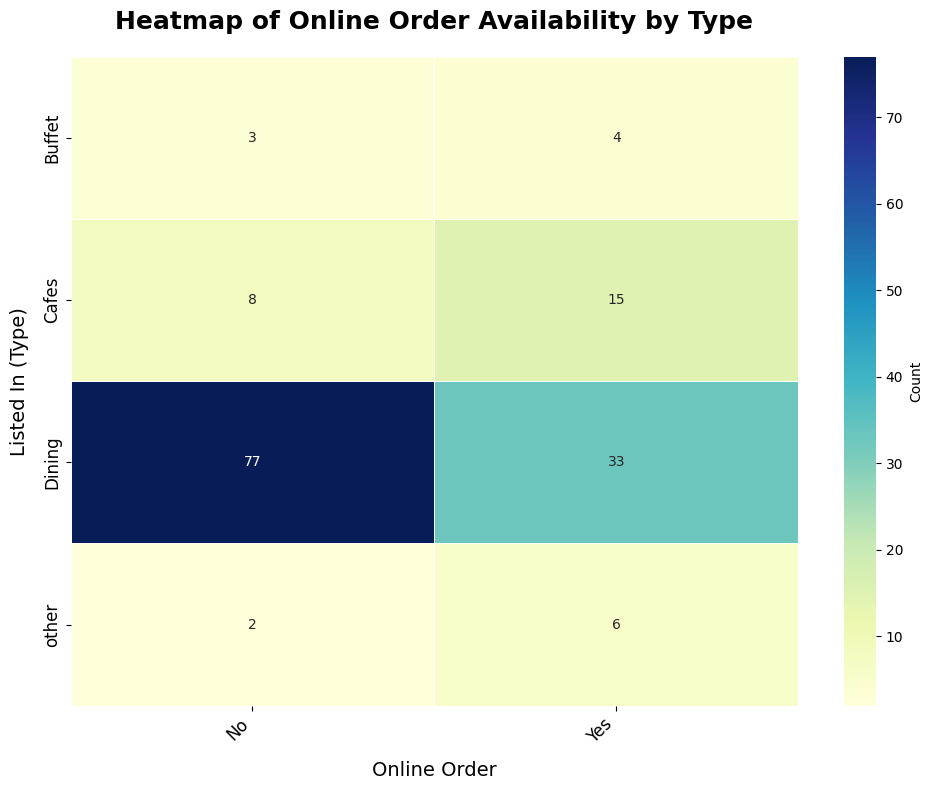

In [103]:
# Adjust figure size for better readability
plt.figure(figsize=(10, 8))

# Create the heatmap with enhanced features
sns.heatmap(
    pivot_table, 
    annot=True, 
    cmap='YlGnBu', 
    fmt='d', 
    linewidths=0.5,  # Add space between cells
    linecolor='white',  # Line color for separation
    cbar_kws={'label': 'Count'}  # Label for color bar
)

# Add title and labels with enhanced font sizes and weight
plt.title("Heatmap of Online Order Availability by Type", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Online Order", fontsize=14, labelpad=10)
plt.ylabel("Listed In (Type)", fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability if they are long
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Use tight layout for better spacing
plt.tight_layout()

plt.show()


<b> ----> Conclusion: Dining restaurants primarily accept offline orders, while cafes mainly receive online orders. This suggests that customers prefer placing orders in person at restaurants, but tend to choose online ordering when dining at cafes